In [9]:
library(readr)#Me sirve para leer archivos
library(tseries) #Me sirve para hacer gráficas de series de tiempo
library(ggplot2) #Me sirve para hacer gráficos
library(forecast) #Me sirve para hacer predicciones


In [16]:
setwd("C:/Users/saro2004/Documents/R")
Ejercicio_2 <- read.csv("Ejercicio_2.csv") #Leemos el archivo
Ejercicio_2$No_de_solicitudes <- as.numeric(Ejercicio_2$No_de_solicitudes)
Ejercicio_2 #Mostramos los datos que tenemos

Mes,No_de_solicitudes
ene-18,51832
feb-18,46618
mar-18,57050
abr-18,67542
may-18,64922
jun-18,62346
jul-18,57271
ago-18,44461
sep-18,54133
oct-18,67208


En el caso anterior, observamos que los datos ya están ordenamos de "menor a mayor" de acuerdo a su fecha, entonces pocredemos a realizar lo siguiente

In [18]:
Solicitudes <- ts(Ejercicio_2$No_de_solicitudes, frequency = 12, start = c(2018,1)) #Obtenemos la gráfica de serie de tiempo


Lo que estamos realizando es realizando un formato de los datos a serie de tiempo, su gráfica queda de la siguiente manera:

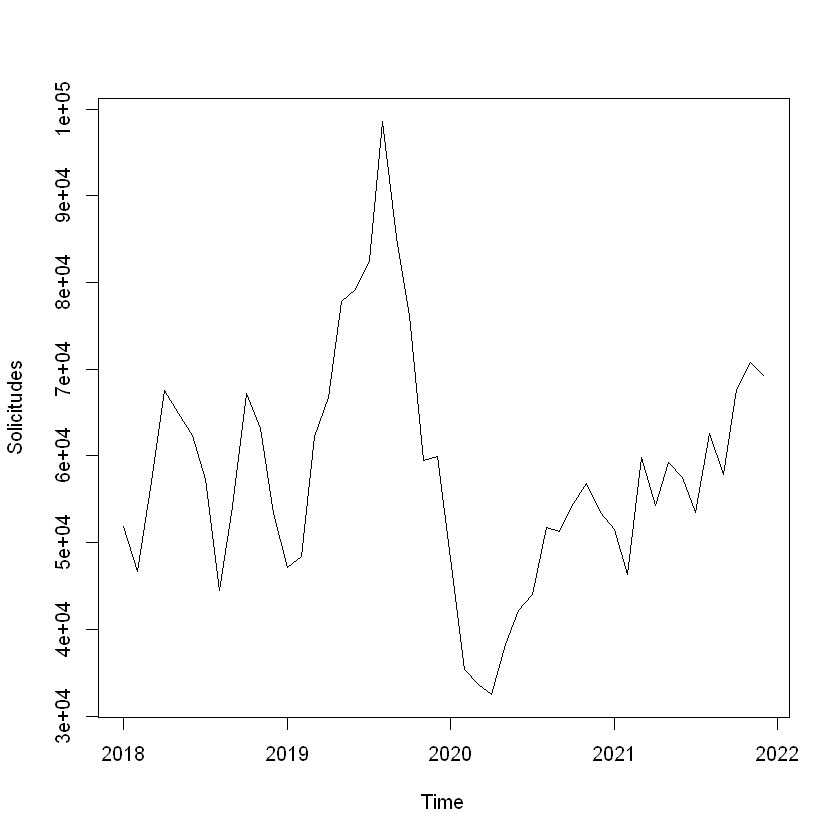

In [19]:
plot(Solicitudes)

Aquí tenemos el número de solicitudes desde enero-2018 a diciembre-2021, pero viendo la gráfica podemos darnos cuenta que hay un "dato atípico", lo cual podría causarnos que nuestra predicción al siguiente año no sea tan acertada.

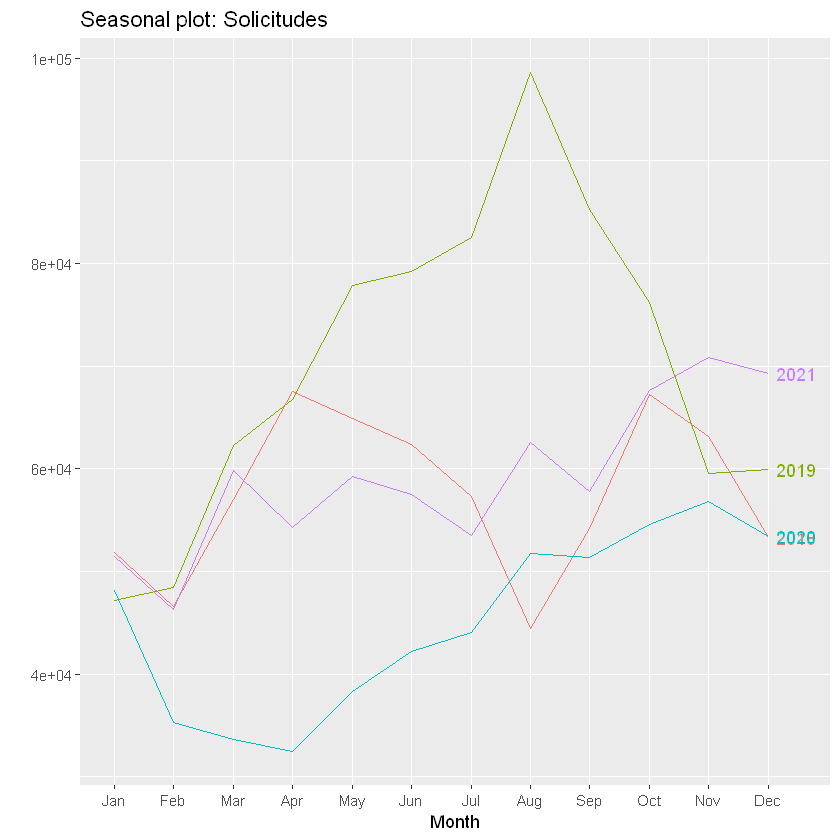

In [20]:
ggseasonplot(Solicitudes, year.labels = T)#Obtenemos la subserie estacional


La gráfica subestacional nos sirve para poder entender el comportamiento que se tuvo los meses respecto al año, es decir, en este caso vemos que el "dato atípico" o más bien, el mes y año en donde se registro mayor número de solicitudos  fue en Agosto de 2019.

In [21]:
Ejercicio_2[20,]

,Mes,No_de_solicitudes
20,ago-19,98588


Con un total de: $98,588$ solicitudes.

Realizando un poco más de puntos que se observa en la gráfica subestacional son:
* Los meses de frebrero, tenemos una "caída" de solicitdes, respesto al mes previo. Con excepción de que en el 2019, se tuvo un crecimiento en solicitudes respecto al mes anterior.


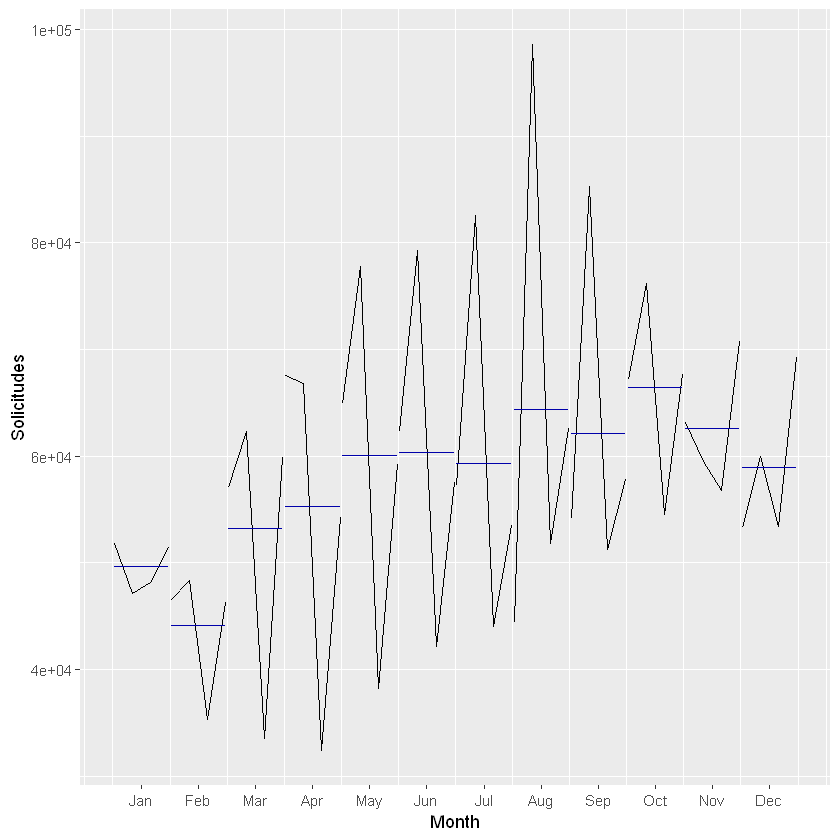

In [22]:
ggsubseriesplot(Solicitudes)#Obtenemos una parcela estacional


Realizando una parcela estacional, nos damos cuenta que en promedio el mes de agosto se tiene mayor solicitudes, con la información del período 2018 al 2022 y el mes en donde en promedio no se tiene tantas solicitudes es Febrero.

In [30]:
Ejercicio_2[c(8,20,32,44),]

,Mes,No_de_solicitudes
8,ago-18,44461
20,ago-19,98588
32,ago-20,51781
44,ago-21,62577


Completanto la idea anterior, en promedio del mes con mayor No de solicitudes (Agosto) es de: $64,351.75$. 

Sabemos que las gráficas de series de tiempos la podemos descomponer en forma aditiva o multiplica, entonces para poder observar su tendencia y saber que método utilizar, procedemos hacer su gráfica de descomposición.

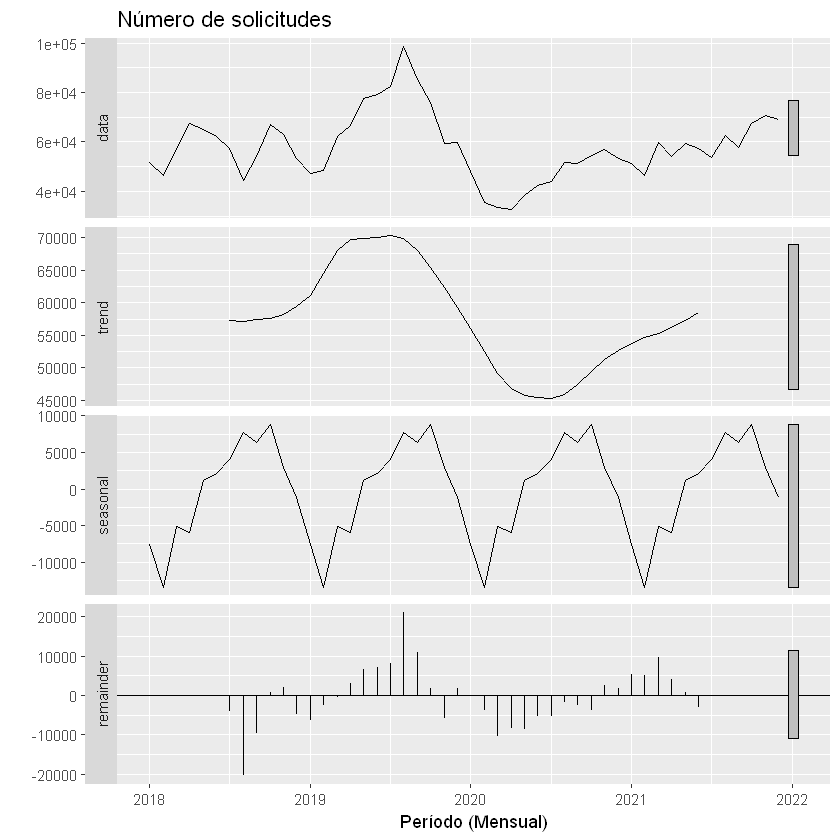

In [34]:
autoplot(decompose(Solicitudes))+ labs(title = "Número de solicitudes", x="Período (Mensual)", y="")+theme_gray()

Con la gráfica anterior, podemos observar como completamos la anterior gráfica (Parcela estacional) , ya que por medio de esta descomposición nos damos cuenta que de enero a febrero, si se tiene un decrecimiento (caída en febrero respecto de enero, a excepción del febrero de 2019 que se tenía lo contrario).

<h1> Análisis de correlograma </h1>

El análisis de correlograma nos sirve para poder saber, que período nos ayuda a "predecir" el futuro. En pocas palabras, es como saber que mes previo influye en mi futuro. 

Dada una serie de tiempo $Y_t$, en donde en este caso $Y_T$ es el número de solicitudes que se tiene mes con mes, entonces se define su **función de auto-correlación de retraso k** como: $$\gamma _k(t)=corr(Y_t,Y_{t-k})$$


Autocorrelations of series 'ts(Solicitudes)', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.818  0.588  0.355  0.169  0.018 -0.169 -0.301 -0.406 -0.384 -0.299 
    11     12     13     14     15     16     17     18     19     20     21 
-0.220 -0.152 -0.105 -0.057 -0.049 -0.106 -0.139 -0.193 -0.186 -0.173 -0.149 
    22     23     24     25     26     27     28     29     30     31     32 
-0.095 -0.039  0.053  0.094  0.138  0.144  0.138  0.129  0.095  0.047  0.000 
    33     34     35     36 
-0.035 -0.032  0.002  0.022 

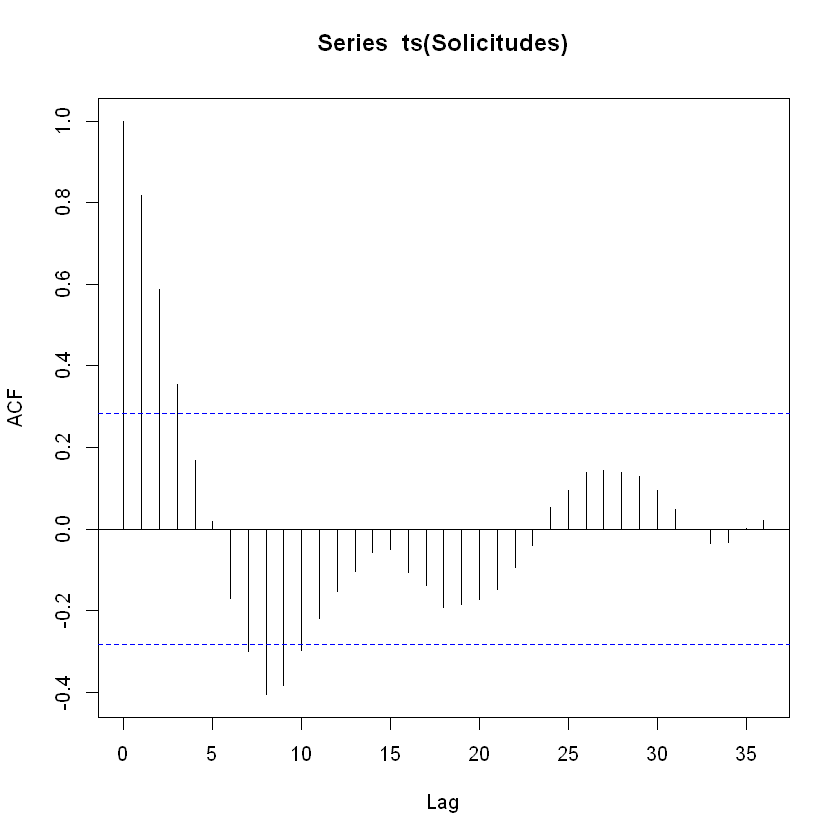

In [39]:
(acf(ts(Solicitudes),lag.max=36))

Observamos en la gráfia de la serie, que si queremos predecir el mes siguiente, nos ayuda demasiado en como se comporto el mes previo, ya que si autocorrelación es mayor respecto a los demás períodos.  La siguiente gráfica, verifica la anterior. 

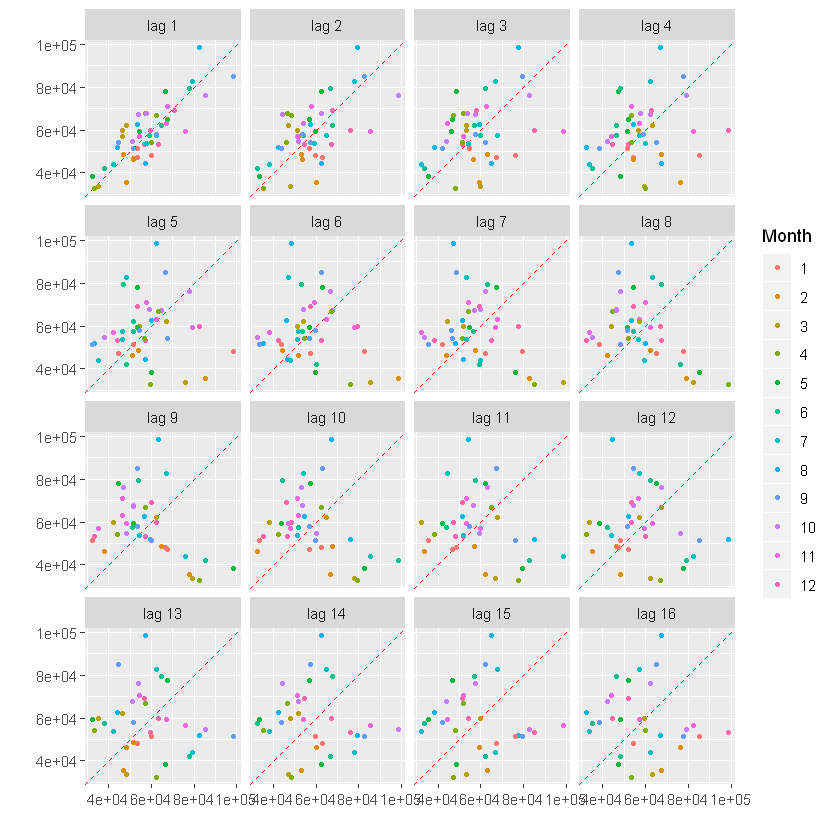

In [41]:
gglagplot(Solicitudes, do.lines =FALSE, diag = TRUE, diag.col ="red")

Observamos que hay una mayor rleación en el período $k-1$, ya que hay "más puntos cerca de la linera recta".

<h1> Pronostico Holt_Winte </h1>

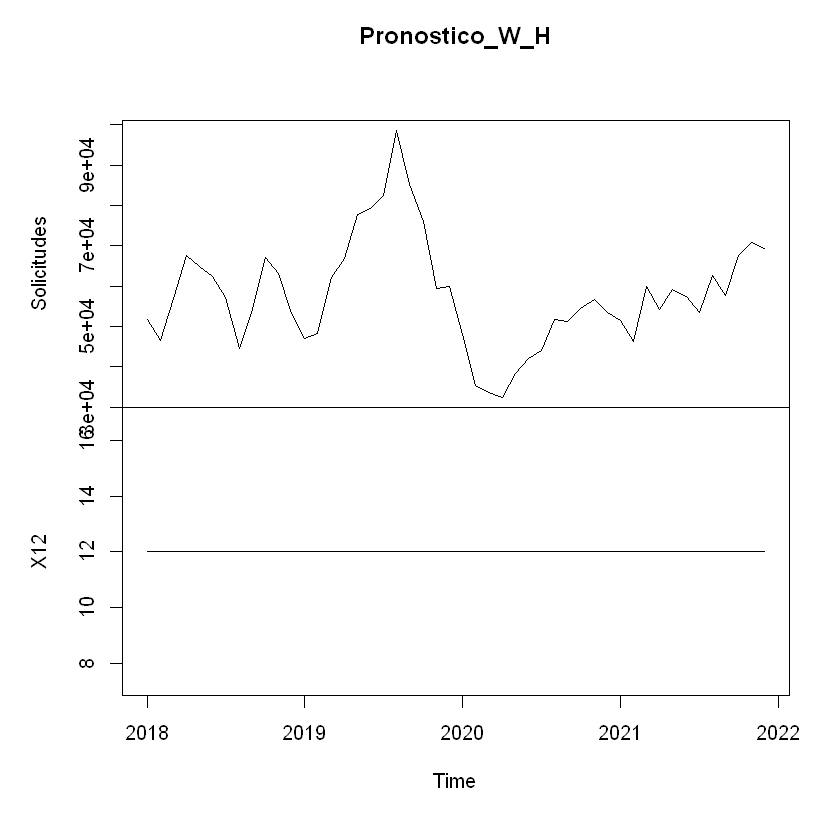

In [56]:
Solicitudes_H_W <- HoltWinters(Solicitudes)
prediccion <- predict(Solicitudes,12)
Pronostico_W_H <- ts(data.frame(Solicitudes,12),frequency =12, star = c(2018,1))
plot(Pronostico_W_H)

<h1> Pronostico Auto-ARIMA </h1>

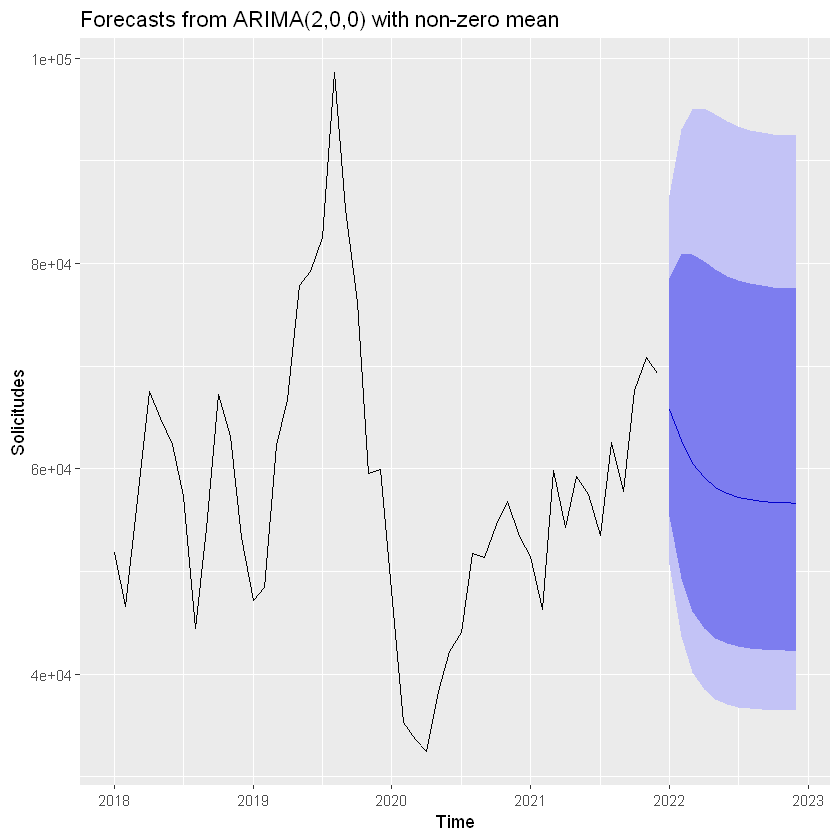

In [48]:
ARIMA_Solicitudes <- auto.arima(Solicitudes, lambda = "auto")
pronostico_ARIMA <- forecast(ARIMA_Solicitudes, h=12)
autoplot(pronostico_ARIMA)


<h1> Predicción dada la función ets() de R </h1>

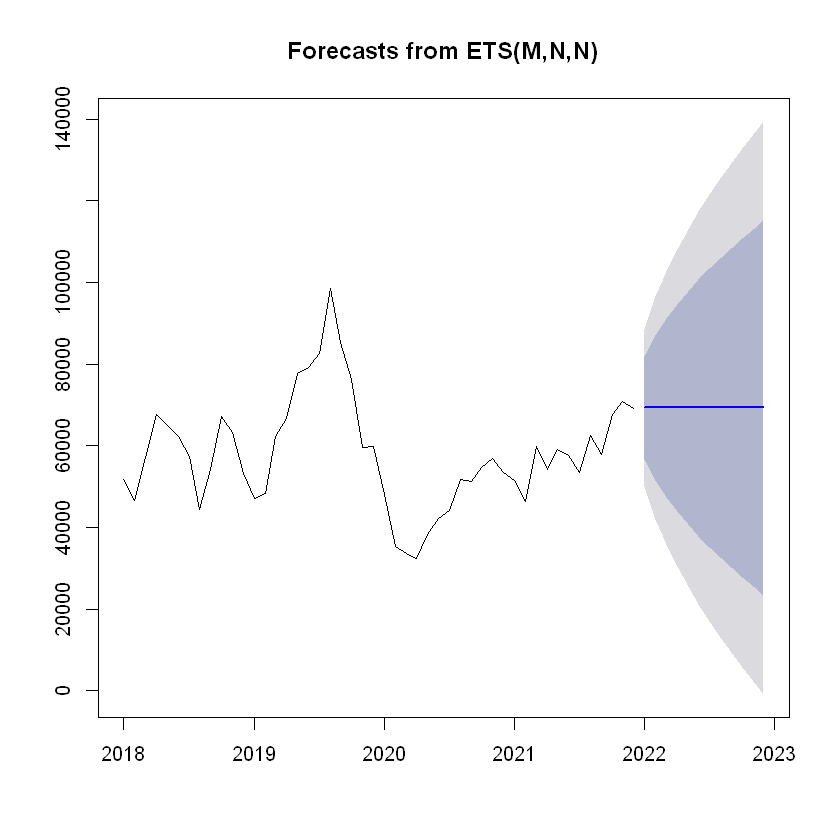

In [45]:
Suavizado_Solicitudes <- ets(Solicitudes, model ="ZZZ")
Pronostic_Solicitudes_ets <- forecast(Solicitudes, h=12)
plot(Pronostic_Solicitudes_ets)

Ya no me dio tiempo de realizar un poco más de análisis :(